<a href="https://colab.research.google.com/github/anisaabdul/c-program1/blob/main/Exit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [88]:
train=pd.read_csv('/content/train_LZdllcl(1).csv')
train





,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [89]:
test = pd.read_csv('/content/test_2umaH9m(1).csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [90]:
submission = pd.read_csv('/content/sample_submission_M0L0uXE(1).csv')
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [91]:
# EDA (Example)
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Missing values:\n", train.isnull().sum())

Train shape: (54808, 14)
Test shape: (23490, 13)
Missing values:
 employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


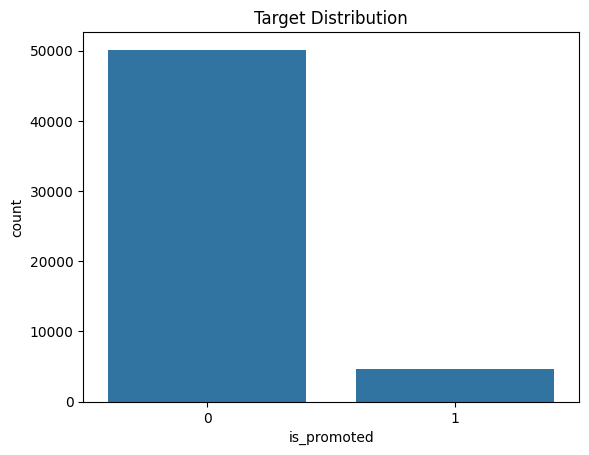

In [92]:
# View target column distribution (assuming it's 'is_promoted')
if 'is_promoted' in train.columns:
    sns.countplot(x='is_promoted', data=train)
    plt.title('Target Distribution')
    plt.show()

In [93]:
#  Identify categorical columns
categorical_cols = train.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [94]:
# Label Encoding categorical features
cat_cols = train.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

In [95]:
#  Drop ID column if present
id_col = 'employee_id'
if id_col in train.columns:
    train.drop(columns=[id_col], inplace=True)
    test_ids = test[id_col]
    test.drop(columns=[id_col], inplace=True)


In [96]:
#  Split X and y
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']


In [97]:
# Train/Test split (for internal validation)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
#  Model Training (Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
#  Evaluate
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.9369640576537128
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.84      0.29      0.44       908

    accuracy                           0.94     10962
   macro avg       0.89      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962



In [100]:
#  Final prediction on test set
final_preds = model.predict(test)


In [101]:
#  Create submission file
submission['is_promoted'] = final_preds
submission.to_csv("final_submission.csv", index=False)
print("✅ Submission file created: final_submission.csv")

✅ Submission file created: final_submission.csv
